# Task  3  Exploratory Data Analysis

# GRIPMAY2021 - The Sparks Foundation - Data Science & Business Analytics Internship

# Author:BENABDELLAH RHOFRANE

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [3]:

sample = pd.read_csv("Documents/SampleSuperstore.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Checking for Null values if there are any.
sample.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# Chaecking the dupilication in data
sample.duplicated().sum()

17

In [10]:
sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
#Correlation Between Variables.
sample.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

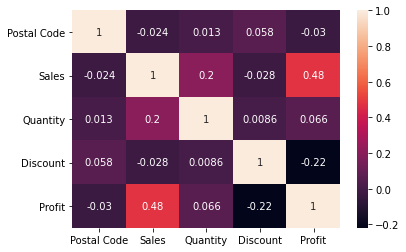

In [15]:
#visualizing the correlation between the features
import seaborn as sns
sns.heatmap(sample.corr(),annot=True)

In [25]:
def getUnique(sample,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in sample.columns.values if len(sample[i].unique()) < threshold_categories and len(sample[i].unique()) > 1]
    
    fig = plt.figure(figsize = (20,20))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        sample.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 3.0)
    plt.show()

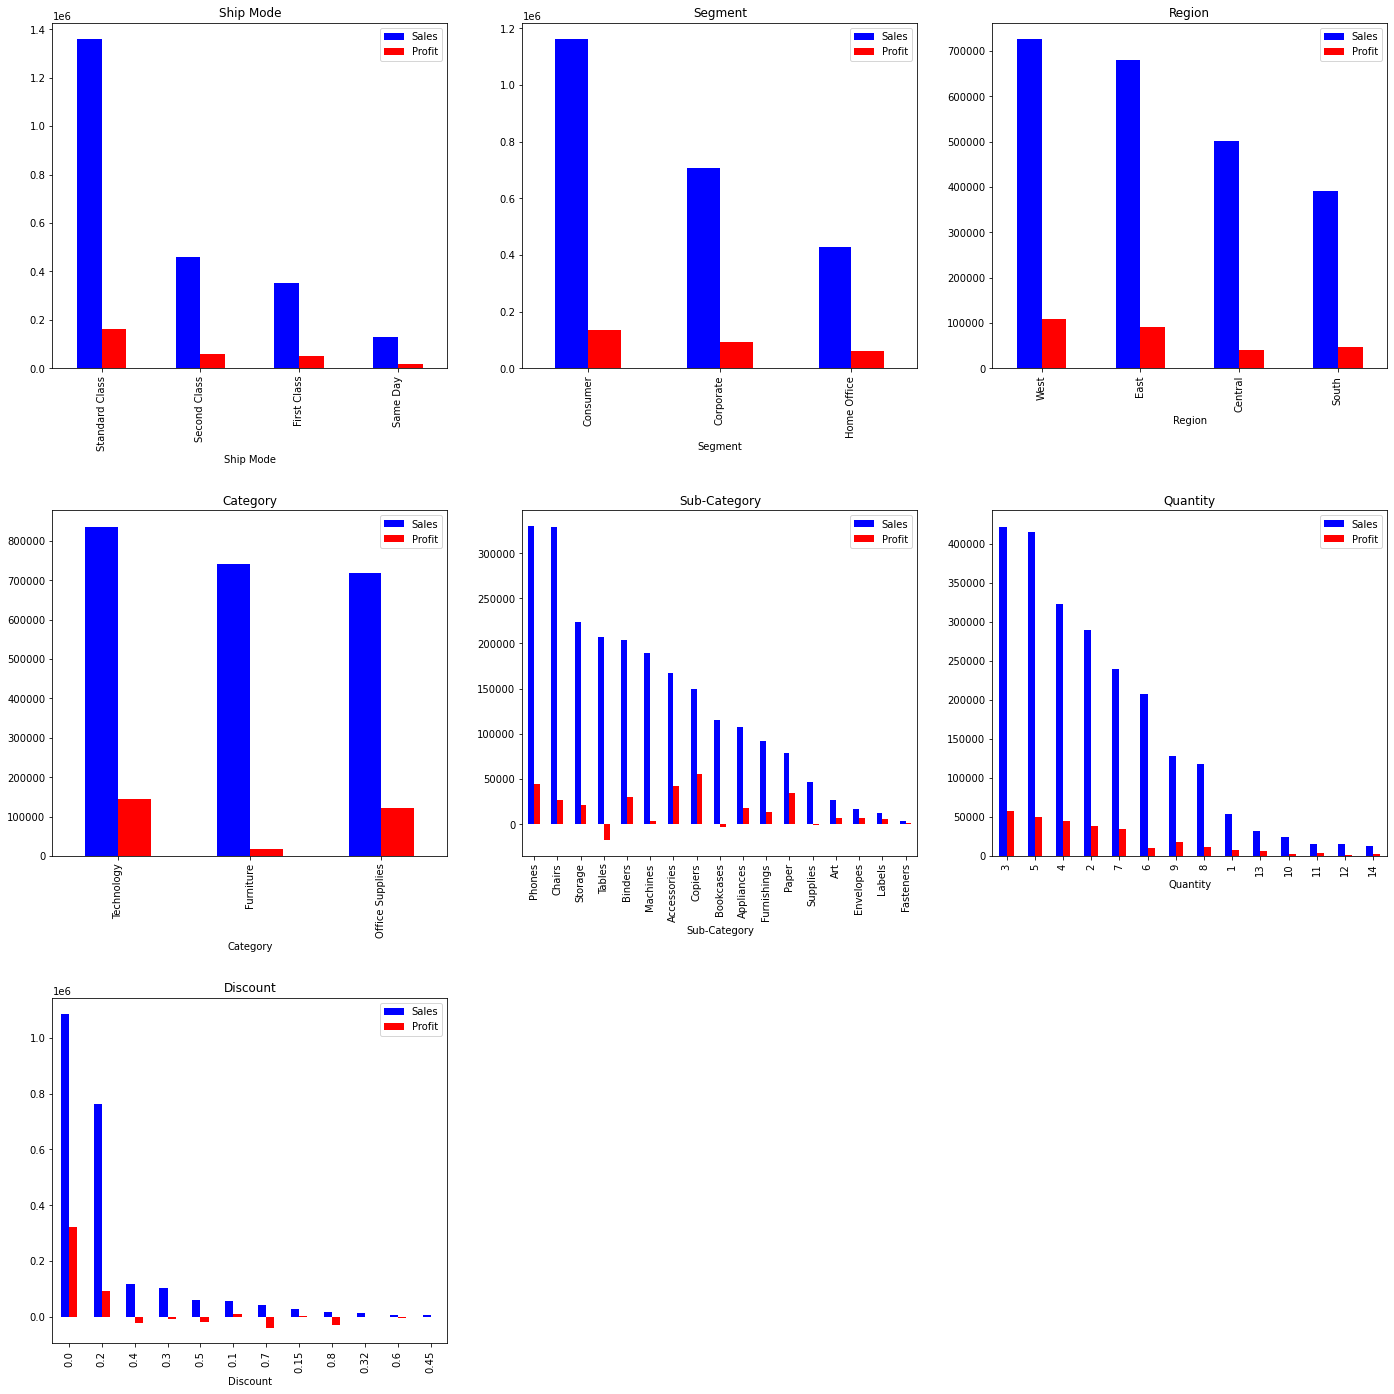

In [27]:


num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["blue", "red"]
getUnique(sample, target_variable, sort_by, color, num_categories)

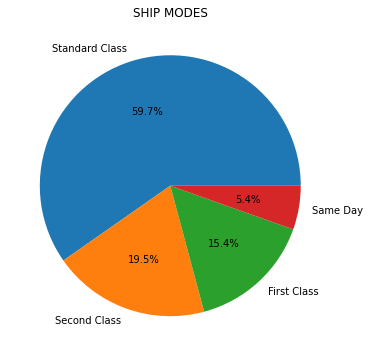

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

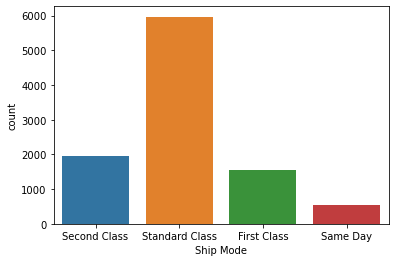

In [29]:
plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(sample['Ship Mode'].value_counts(), labels=sample['Ship Mode'].value_counts().index, autopct= '%1.1f%%')
plt.show()
sns.countplot(x=sample['Ship Mode'])

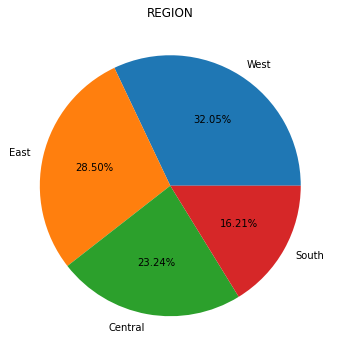

In [31]:
#Pie Chart for Share of sales in different Region
plt.figure(figsize = (6,6))
plt.title('REGION')
plt.pie(sample['Region'].value_counts(), labels=sample['Region'].value_counts().index, autopct = '%1.2f%%')
plt.show()

E:\prog\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


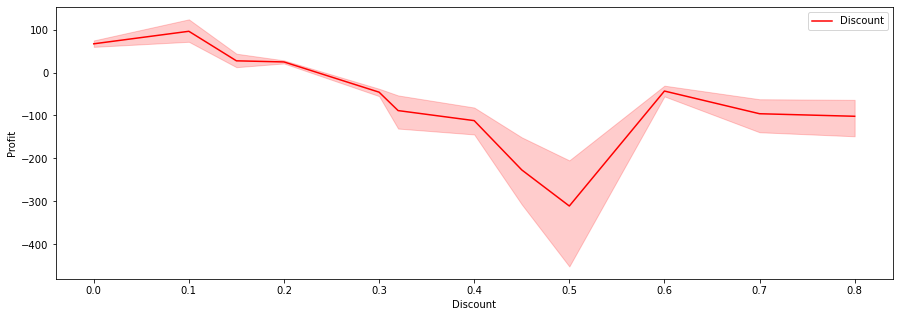

In [32]:
#Plot for Discount Vs Profit
plt.figure(figsize=(15,5))
sns.lineplot('Discount', 'Profit', data=sample, color ='r', label='Discount')
plt.legend()

E:\prog\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


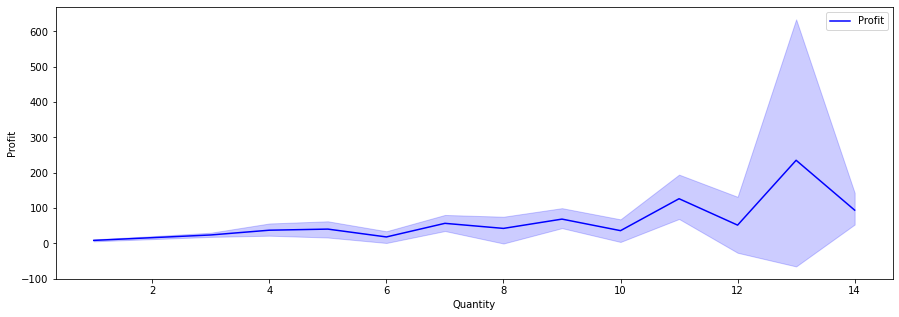

In [33]:
#Plot for Quantity Vs Profit
plt.figure(figsize=(15,5))
sns.lineplot('Quantity', 'Profit', data=sample, color ='b', label='Profit')
plt.legend()


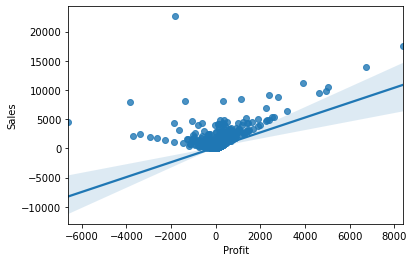

In [34]:
sns.regplot(x = "Profit", y = "Sales", data = sample)
plt.show()

# Max Profit anaysis for each Category

<AxesSubplot:xlabel='Sub-Category'>

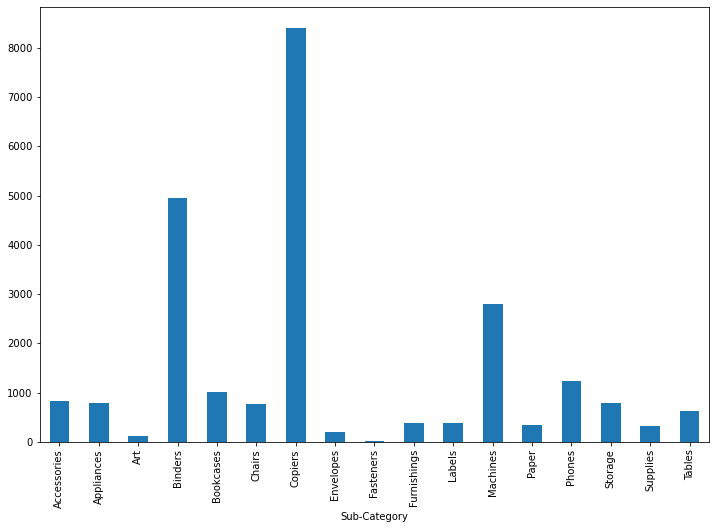

In [35]:
sample.groupby('Sub-Category')['Profit'].max().plot.bar(figsize=(12,8))

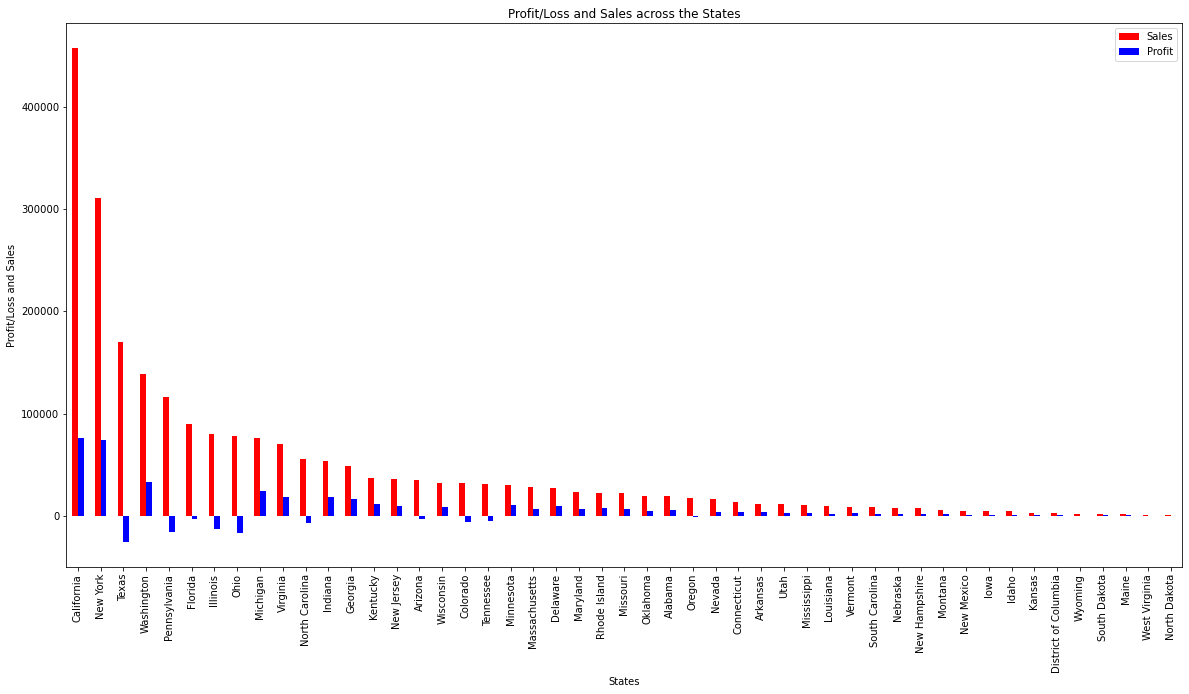

In [36]:
pls=sample.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','blue'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

In [37]:
smallest = sample.nsmallest(5, "Profit")
smallest

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845


<AxesSubplot:xlabel='Region'>

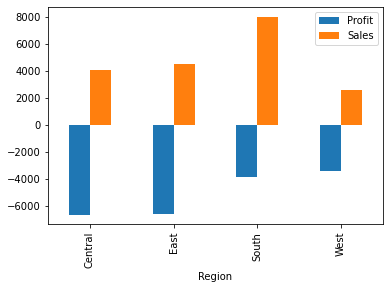

In [38]:
smallest.groupby('Region')[['Profit','Sales']].sum().plot.bar()

In [51]:
states_sample = sample.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_sample

,Sales,Profit,Discount
State,,,
California,457687.6315,76381.3871,145.60
New York,310876.2710,74038.5486,62.40
Texas,170188.0458,-25729.3563,364.64
Washington,138641.2700,33402.6517,32.40
Pennsylvania,116511.9140,-15559.9603,192.90
Florida,89473.7080,-3399.3017,114.65
Illinois,80166.1010,-12607.8870,191.90
Ohio,78258.1360,-16971.3766,152.40
Michigan,76269.6140,24463.1876,1.80


In [52]:
states_sample['Discount'][states_sample['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.80
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.40
Illinois          191.90
Pennsylvania      192.90
Texas             364.64
Name: Discount, dtype: float64

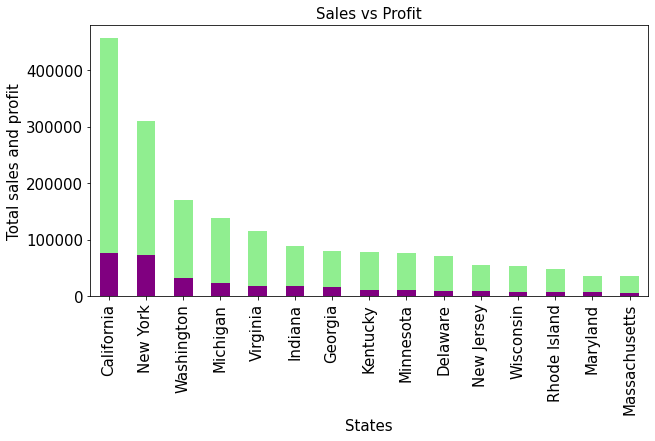

In [39]:
Sales = sample.groupby('State').sum()['Sales'].nlargest(n=15) #top 15 states with highest sales
Profits = sample.groupby('State').sum()['Profit'].nlargest(n=15) #top 15 states with highest sales

Sales.plot(kind='bar', figsize=(10,5),fontsize = 15, color = 'lightgreen')
Profits.plot(kind='bar', figsize=(10,5),fontsize = 15 , color='Purple')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales and profit',fontsize = 15)
plt.title("Sales vs Profit",fontsize = 15)
plt.show()